In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# Importing Data 

In [2]:
newCustomerData = pd.read_csv('dataset/customerData_Clean.csv')
newCustomerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2199,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,267,18,0,1960,1,1
2200,2200,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,30,22,1,1940,3,1
2201,2201,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,297,19,1,1980,0,0
2202,2202,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,324,23,0,1950,1,1


# Formalizing Variable Types

In [3]:
newCustomerData['NumWebVisitsMonth'] = newCustomerData['NumWebVisitsMonth'].astype("category")
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Dt_Customer'] = newCustomerData['Dt_Customer'].astype("datetime64[ns]")

In [4]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2204 non-null   int64         
 1   Year_Birth           2204 non-null   int64         
 2   Education            2204 non-null   object        
 3   Marital_Status       2204 non-null   object        
 4   Income               2204 non-null   float64       
 5   Kidhome              2204 non-null   int64         
 6   Teenhome             2204 non-null   int64         
 7   Dt_Customer          2204 non-null   datetime64[ns]
 8   Recency              2204 non-null   int64         
 9   MntWines             2204 non-null   int64         
 10  MntFruits            2204 non-null   int64         
 11  MntMeatProducts      2204 non-null   int64         
 12  MntFishProducts      2204 non-null   int64         
 13  MntSweetProducts     2204 non-nul

In [5]:
newCustomerData.describe()

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,TotalChild,HaveChild
count,2204.000000,2204.000000,2204.000000,2204.00000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,...,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,1101.500000,1968.839383,51361.583485,0.44873,0.509528,49.245463,302.938748,26.190109,162.049456,37.188748,...,2.329855,4.051724,2.603448,5.809891,0.009074,225.428312,14.794918,0.433303,0.958258,0.720508
std,636.384318,11.687121,20228.110147,0.53950,0.543521,28.903303,335.381998,39.606664,212.580278,54.207070,...,1.874791,2.623967,2.726729,3.228993,0.094848,275.823817,7.580624,0.868889,0.750899,0.448851
min,0.000000,1940.000000,1730.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,550.750000,1959.000000,35335.500000,0.00000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,1.000000,2.000000,0.000000,3.000000,0.000000,25.000000,8.000000,0.000000,0.000000,0.000000
50%,1101.500000,1970.000000,51132.500000,0.00000,0.000000,50.000000,174.000000,8.000000,66.000000,12.000000,...,2.000000,4.000000,2.000000,5.000000,0.000000,90.000000,15.000000,0.000000,1.000000,1.000000
75%,1652.250000,1977.000000,67560.750000,1.00000,1.000000,74.000000,503.250000,33.000000,226.250000,50.000000,...,3.000000,6.000000,4.000000,8.000000,0.000000,348.750000,21.000000,1.000000,1.000000,1.000000
max,2203.000000,1996.000000,94384.000000,2.00000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,...,15.000000,11.000000,11.000000,13.000000,1.000000,1306.000000,39.000000,5.000000,3.000000,1.000000


In [6]:
# import numpy as np
# import pandas as pd
# import seaborn as sb
# import matplotlib.pyplot as plt
# sb.set()
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder

# customerData = pd.read_csv('C:/Users/LDW/Documents/GitHub/SC1015-Group9/dataset/train_data.csv')
# colOfNum = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']
# colOfCat = ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']
# print("Column of numerical data:",colOfNum)
# print()
# print("Column of categorical data:",colOfCat)
# # Column of numerical data: ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']
# # Column of categorical data: ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder

# # define one hot encoding
# encoder = OneHotEncoder(sparse=False)

# # initialise variables
# edu, ms, dtCus, yr, ac3, ac4, ac5, ac1, ac2, com, res, kid, teen =\
# [pd.DataFrame(newCustomerData[categories]) for categories in colOfCat]

# edu_dict, ms_dict, dtCus_dict, yr_dict, ac3_dict, ac4_dict,\
# ac5_dict, ac1_dict, ac2_dict, com_dict, res_dict, kid_dict,\
# teen_dict = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# var_list = [edu, ms, dtCus, yr, ac3, ac4, ac5, ac1, ac2, com, res, kid, teen]
# dict_list = [edu_dict, ms_dict, dtCus_dict, yr_dict, ac3_dict, ac4_dict,\
# ac5_dict, ac1_dict, ac2_dict, com_dict, res_dict, kid_dict, teen_dict]


# def make_dict(a_dict, data, onehot):
#     for i in range(len(data)):
#         key = data[i][0]
#         value = onehot[i]
#         a_dict[key] = value

# def prepare_data(category):
#     category = category.squeeze()
#     category = pd.unique(category)
#     data = [[elements] for elements in category]
#     data = asarray(data)
#     return data

# for i in range(len(dict_list)):
#     data = prepare_data(var_list[i])
#     onehot = encoder.fit_transform(data)
#     make_dict(dict_list[i], data, onehot)

In [6]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2204 non-null   int64         
 1   Year_Birth           2204 non-null   int64         
 2   Education            2204 non-null   object        
 3   Marital_Status       2204 non-null   object        
 4   Income               2204 non-null   float64       
 5   Kidhome              2204 non-null   int64         
 6   Teenhome             2204 non-null   int64         
 7   Dt_Customer          2204 non-null   datetime64[ns]
 8   Recency              2204 non-null   int64         
 9   MntWines             2204 non-null   int64         
 10  MntFruits            2204 non-null   int64         
 11  MntMeatProducts      2204 non-null   int64         
 12  MntFishProducts      2204 non-null   int64         
 13  MntSweetProducts     2204 non-nul

# Visualization 

<Figure size 144x432 with 0 Axes>

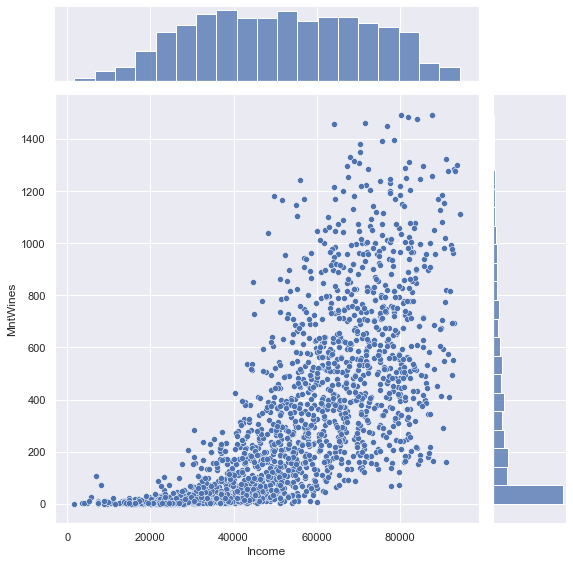

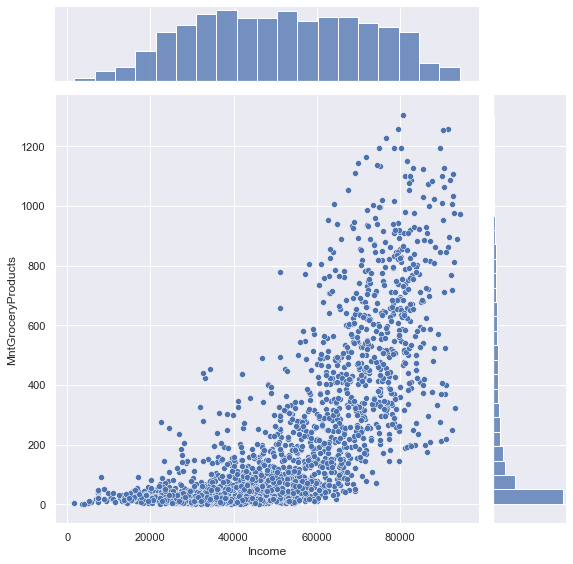

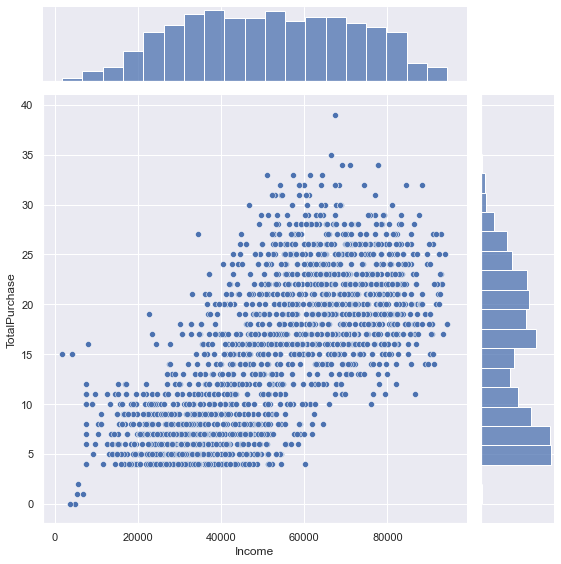

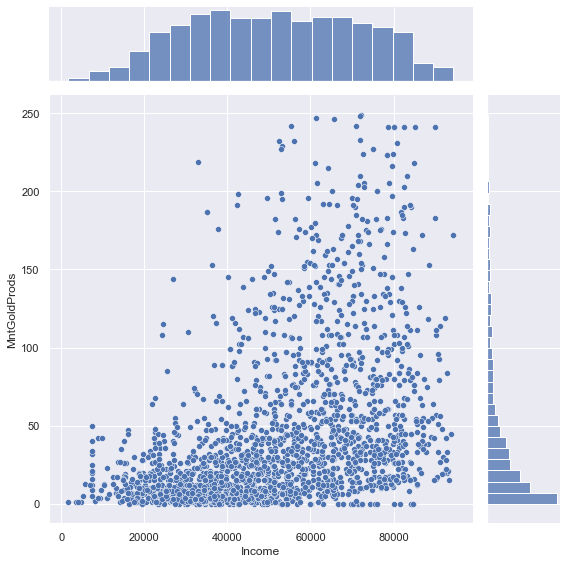

In [7]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGoldProds", height = 8)

<AxesSubplot:>

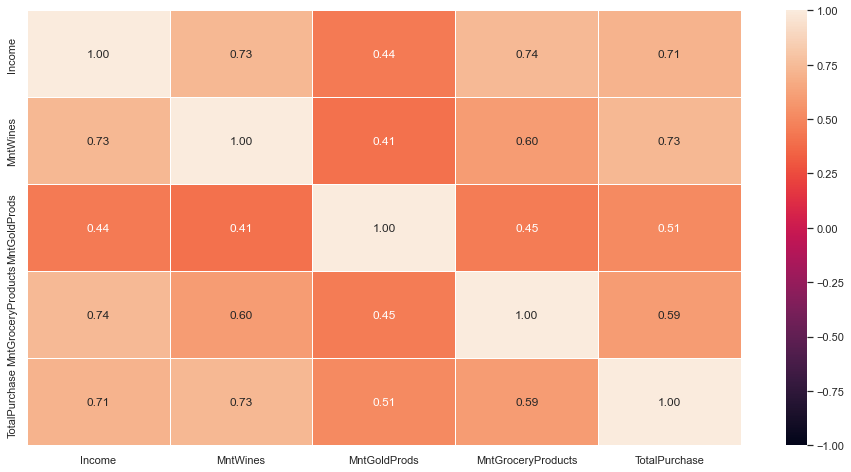

In [8]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(newCustomerData[['YearRange', 'Education', 'Marital_Status', 
                            'Income','MntWines','MntGoldProds',
                            'NumWebVisitsMonth','MntGroceryProducts',
                            'TotalPurchase']].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", linewidths=.5)

In [10]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
customerData_cat = newCustomerData[['NumWebVisitsMonth','YearRange']]
ohe.fit(customerData_cat)
customerData_cat_ohe = pd.DataFrame(ohe.transform(customerData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(customerData_cat.columns))

# Check the encoded variables
customerData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NumWebVisitsMonth_0   2204 non-null   float64
 1   NumWebVisitsMonth_1   2204 non-null   float64
 2   NumWebVisitsMonth_2   2204 non-null   float64
 3   NumWebVisitsMonth_3   2204 non-null   float64
 4   NumWebVisitsMonth_4   2204 non-null   float64
 5   NumWebVisitsMonth_5   2204 non-null   float64
 6   NumWebVisitsMonth_6   2204 non-null   float64
 7   NumWebVisitsMonth_7   2204 non-null   float64
 8   NumWebVisitsMonth_8   2204 non-null   float64
 9   NumWebVisitsMonth_9   2204 non-null   float64
 10  NumWebVisitsMonth_10  2204 non-null   float64
 11  NumWebVisitsMonth_13  2204 non-null   float64
 12  NumWebVisitsMonth_14  2204 non-null   float64
 13  NumWebVisitsMonth_19  2204 non-null   float64
 14  NumWebVisitsMonth_20  2204 non-null   float64
 15  YearRange_1940       

# Machine Learning

In [9]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts'])
X = pd.DataFrame(newCustomerData['Income'])

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

Train Set : (1763, 1) (1763, 1)
Test Set  : (441, 1) (441, 1)


In [10]:
# from sklearn.model_selection import train_test_split

# Extract Response and Predictors
totalPurchases = pd.DataFrame(newCustomerData['TotalPurchase'])
income = pd.DataFrame(newCustomerData['Income'])

# Split the Dataset into random Train and Test
income_train, income_test, totalPurchases_train, totalPurchases_test = train_test_split(income, totalPurchases, test_size = 0.2)

# Check the sample sizes
print("Train Set :", income_train.shape, totalPurchases_train.shape)
print("Test Set  :", income_test.shape, totalPurchases_test.shape)

Train Set : (1763, 1) (1763, 1)
Test Set  : (441, 1) (441, 1)


## Ridge Regression 

In [19]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = .5)
reg.fit(X_train, Y_train)
reg.coef_

array([[0.01007461]])

## Linear Regression (for reference) 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

pd.DataFrame(list(zip(X_train.columns, linreg1.coef_[0])), columns = ["Predictors", "Coefficients"])

,Predictors,Coefficients
0,Income,0.010053


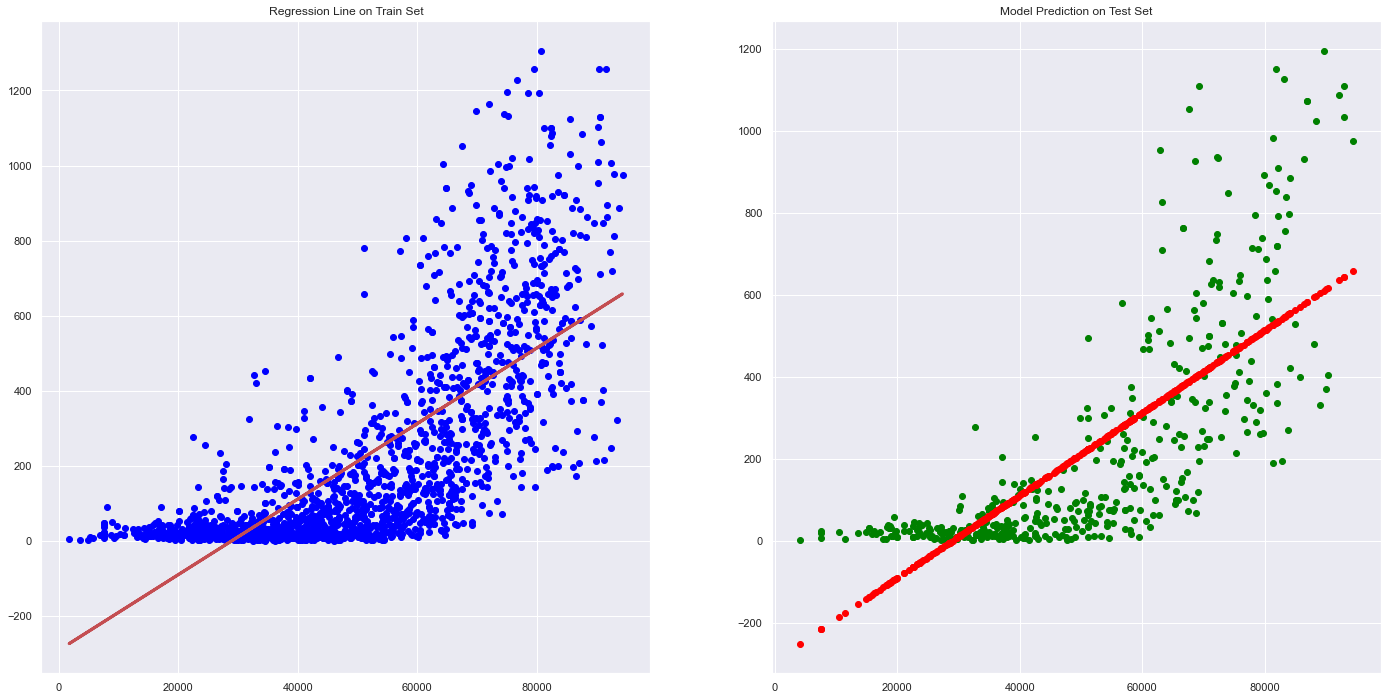

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5437274654046866
Mean Squared Error (MSE) 	: 34660.927331966996

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5683686961854086
Mean Squared Error (MSE) 	: 32956.7319792567

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 34660.927331966996

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 32956.7319792567



In [12]:
regline_x = X_train
regline_y = linreg1.intercept_ + linreg1.coef_ * X_train

# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train, Y_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'r', linewidth = 3)
axes[0].set_title("Regression Line on Train Set")
axes[1].scatter(X_test, Y_test, color = "green")
axes[1].scatter(X_test, Y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [13]:
linreg2 = LinearRegression()
linreg2.fit(income_train, totalPurchases_train)

print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

Intercept 	: b =  [1.30881128]
Coefficients 	: a =  [[0.00026127]]


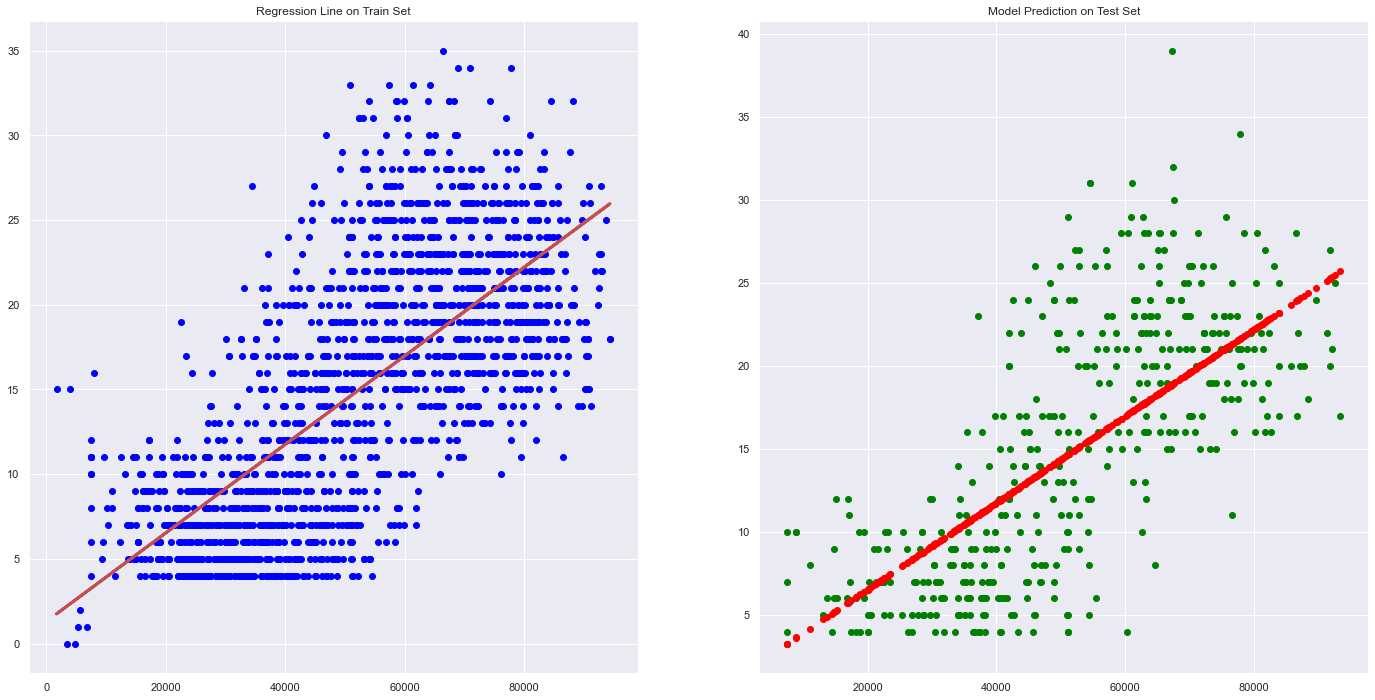

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5003664994720203
Mean Squared Error (MSE) 	: 28.411360628571465

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5157959106983057
Mean Squared Error (MSE) 	: 28.88489604343081

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.411360628571465

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 28.88489604343081



In [14]:
regline_x = income_train
regline_y = linreg2.intercept_ + linreg2.coef_ * income_train

# Predict Response corresponding to Predictors
totalPurchases_train_pred = linreg2.predict(income_train)
totalPurchases_test_pred = linreg2.predict(income_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(income_train, totalPurchases_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'r', linewidth = 3)
axes[0].set_title("Regression Line on Train Set")
axes[1].scatter(income_test, totalPurchases_test, color = "green")
axes[1].scatter(income_test, totalPurchases_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_train, totalPurchases_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_test, totalPurchases_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()

## Exponential Regression 

In [14]:
X = np.array(newCustomerData['Income'])
print(X)
Y = np.array(newCustomerData['MntGroceryProducts'])
print(Y)

[58138 46344 71613 ... 56981 69245 52869]
[806   9 287 ... 297 324  66]


In [15]:
ylog_data = np.log(Y)
print(ylog_data)
  
curve_fit = np.polyfit(X, ylog_data, 1)
print(curve_fit)

[6.69208374 2.19722458 5.65948222 ... 5.69373214 5.78074352 4.18965474]
[6.00146653e-05 1.37938297e+00]


In [16]:
y = np.exp(1.37938297e+00) * np.exp(6.00146653e-05*X)
  
print(y)

[130.12760959  64.11655627 292.13417382 ... 121.39851102 253.4327416
  94.85015303]


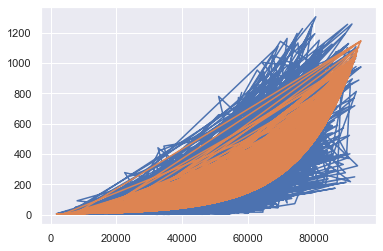

In [17]:
# Blue 
plt.plot(X, Y)
  
# best fit in orange
plt.plot(X, y)

In [15]:
sample_data = pd.DataFrame(newCustomerData['NumWebVisitsMonth'])
sample_data = sample_data.sample(n=1000,replace="False")
sample_data.shape

(1000, 1)

In [85]:
newCustomerData['Income'].describe()

count     2208.000000
mean     51373.153080
std      20224.668686
min       1730.000000
25%      35376.000000
50%      51111.000000
75%      67560.750000
max      94384.000000
Name: Income, dtype: float64

Train Set : (1763, 7) (1763, 1)
Test Set  : (441, 7) (441, 1)
[-1.13849586]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.232861232461416
Mean Squared Error (MSE) 	: 1974.07469224335

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.20848268540943427
Mean Squared Error (MSE) 	: 1944.5782136236555

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1974.07469224335

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1944.5782136236555



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


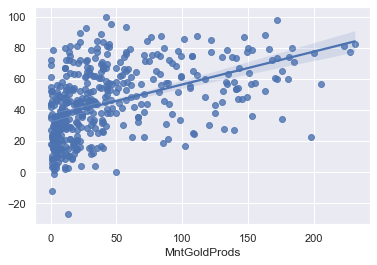

In [39]:
Y = pd.DataFrame(newCustomerData['MntGoldProds'])
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
income = pd.DataFrame(newCustomerData['Income'])

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1)
X.head()

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1763, 7) (1763, 1)
Test Set  : (441, 7) (441, 1)
[1.91311033]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5065308602025853
Mean Squared Error (MSE) 	: 28.261903137417296

Goodness of Fit of Model 	Test Dataset


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Explained Variance (R^2) 	: 0.48420458362893826
Mean Squared Error (MSE) 	: 29.28870651781599

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.261903137417296

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 29.28870651781599



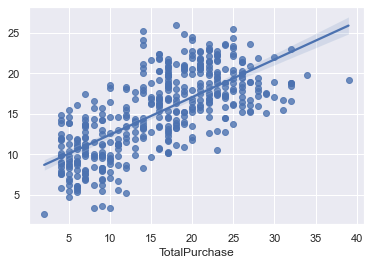

In [17]:
Z = pd.DataFrame(newCustomerData['TotalPurchase'])
A = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
income = pd.DataFrame(newCustomerData['Income'])

A = pd.get_dummies(data=A, drop_first=True)
A = pd.concat([A, income], axis=1)
A.head()

# Split the Dataset into random Train and Test
A_train, A_test, Z_train, Z_test = train_test_split(A, Z, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", A_train.shape, Z_train.shape)
print("Test Set  :", A_test.shape, Z_test.shape)

model = LinearRegression()
model.fit(A_train,Z_train)

print(model.intercept_)

predictions = model.predict(A_test)
predictions

sb.regplot(Z_test,predictions)

Z_train_pred = model.predict(A_train)
Z_test_pred = model.predict(A_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(A_train, Z_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Z_train, Z_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(A_test, Z_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Z_test, Z_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Z_train, Z_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Z_test, Z_test_pred))
print()

Train Set : (1763, 7) (1763, 1)
Test Set  : (441, 7) (441, 1)
[-292.7552791]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5729061250589491
Mean Squared Error (MSE) 	: 99608.83014052795

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5507594841006247
Mean Squared Error (MSE) 	: 102624.1677276669

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 99608.83014052795

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 102624.1677276669



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


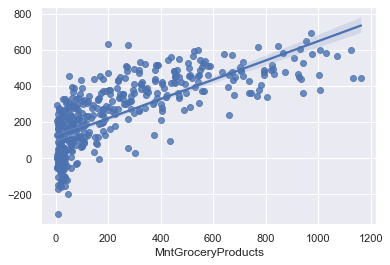

In [18]:
Y = pd.DataFrame(newCustomerData['MntGroceryProducts'])
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
income = pd.DataFrame(newCustomerData['Income'])

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1)
X.head()

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1763, 7) (1763, 1)
Test Set  : (441, 7) (441, 1)
[-356.10320081]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5494144123780751
Mean Squared Error (MSE) 	: 166352.21208283014

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5406416978959281
Mean Squared Error (MSE) 	: 186420.3536708881

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 166352.21208283014

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 186420.3536708881



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


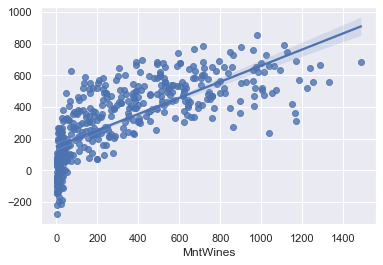

In [19]:
Y = pd.DataFrame(newCustomerData['MntWines'])
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
income = pd.DataFrame(newCustomerData['Income'])

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1)
X.head()

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1763, 7) (1763, 1)
Test Set  : (441, 7) (441, 1)
[-245.44048327]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.537668739682915
Mean Squared Error (MSE) 	: 52325.914527055116

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5062557327211796
Mean Squared Error (MSE) 	: 54870.05393364649

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 52325.914527055116

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 54870.05393364649



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


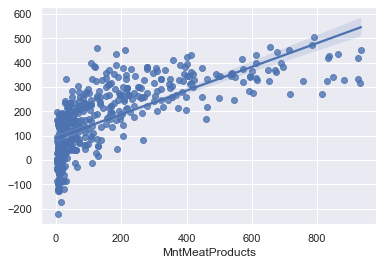

In [20]:
Y = pd.DataFrame(newCustomerData['MntMeatProducts'])
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
income = pd.DataFrame(newCustomerData['Income'])

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1)
X.head()

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1763, 7) (1763, 1)
Test Set  : (441, 7) (441, 1)
[-27.42581457]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.34775132468212033
Mean Squared Error (MSE) 	: 2050.6241856355555

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31629614343944257
Mean Squared Error (MSE) 	: 2025.4301374707431

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 2050.6241856355555

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2025.4301374707431



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


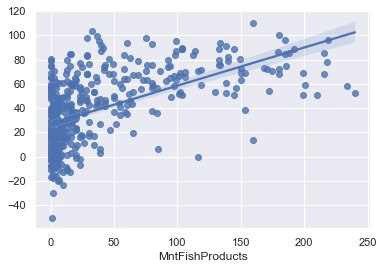

In [21]:
Y = pd.DataFrame(newCustomerData['MntFishProducts'])
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
income = pd.DataFrame(newCustomerData['Income'])

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1)
X.head()

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [24]:
from sklearn.model_selection import KFold

Y = pd.DataFrame(newCustomerData['MntGroceryProducts'])
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']])
# income = pd.DataFrame(newCustomerData['Income'])

# Y = np.array(Y)
# X = np

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1)
# X.head()

# skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
# skf.get_n_splits(X, Y)

# skf

kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

TRAIN: [ 551  552  553 ... 2201 2202 2203] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [22]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2204 non-null   int64         
 1   Year_Birth           2204 non-null   int64         
 2   Education            2204 non-null   object        
 3   Marital_Status       2204 non-null   object        
 4   Income               2204 non-null   float64       
 5   Kidhome              2204 non-null   int64         
 6   Teenhome             2204 non-null   int64         
 7   Dt_Customer          2204 non-null   datetime64[ns]
 8   Recency              2204 non-null   int64         
 9   MntWines             2204 non-null   int64         
 10  MntFruits            2204 non-null   int64         
 11  MntMeatProducts      2204 non-null   int64         
 12  MntFishProducts      2204 non-null   int64         
 13  MntSweetProducts     2204 non-nul

In [25]:
from sklearn.model_selection import KFold

X = pd.DataFrame(newCustomerData[['Year_Birth', 'Education', 'Marital_Status', 'Complain', 
                                 'NumWebVisitsMonth', 'YearRange', 'HaveChild', 'AcceptedCmp']])
Y = pd.DataFrame(newCustomerData[['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
                                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                                 'MntGroceryProducts', 'TotalPurchase', 'TotalChild']])
# income = pd.DataFrame(newCustomerData['Income'])

# Y = np.array(Y)
# X = np

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1)
# X.head()

# skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
# skf.get_n_splits(X, Y)

# skf

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X, Y):
#     print("TRAIN:", train_index) 
#     print("TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
train_data = pd.concat([X_train, Y_train])
test_data = pd.concat([X_test, Y_test])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3968 entries, 0 to 1983
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1984 non-null   float64       
 1   Year_Birth           1984 non-null   float64       
 2   Education            1984 non-null   object        
 3   Marital_Status       1984 non-null   object        
 4   Complain             1984 non-null   float64       
 5   NumWebVisitsMonth    1984 non-null   category      
 6   YearRange            1984 non-null   category      
 7   HaveChild            1984 non-null   float64       
 8   AcceptedCmp          1984 non-null   float64       
 9   Income               1984 non-null   float64       
 10  Kidhome              1984 non-null   float64       
 11  Teenhome             1984 non-null   float64       
 12  Dt_Customer          1984 non-null   datetime64[ns]
 13  Recency              1984 non-nul

In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1984 to 2203
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           220 non-null    float64       
 1   Year_Birth           220 non-null    float64       
 2   Education            220 non-null    object        
 3   Marital_Status       220 non-null    object        
 4   Complain             220 non-null    float64       
 5   NumWebVisitsMonth    220 non-null    category      
 6   YearRange            220 non-null    category      
 7   HaveChild            220 non-null    float64       
 8   AcceptedCmp          220 non-null    float64       
 9   Income               220 non-null    float64       
 10  Kidhome              220 non-null    float64       
 11  Teenhome             220 non-null    float64       
 12  Dt_Customer          220 non-null    datetime64[ns]
 13  Recency              220 non-nu

In [38]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2204 non-null   int64         
 1   Year_Birth           2204 non-null   int64         
 2   Education            2204 non-null   object        
 3   Marital_Status       2204 non-null   object        
 4   Income               2204 non-null   float64       
 5   Kidhome              2204 non-null   int64         
 6   Teenhome             2204 non-null   int64         
 7   Dt_Customer          2204 non-null   datetime64[ns]
 8   Recency              2204 non-null   int64         
 9   MntWines             2204 non-null   int64         
 10  MntFruits            2204 non-null   int64         
 11  MntMeatProducts      2204 non-null   int64         
 12  MntFishProducts      2204 non-null   int64         
 13  MntSweetProducts     2204 non-nul

In [39]:
train_data.to_csv('dataset/new_train_data.csv')

In [40]:
test_data.to_csv('dataset/new_test_data.csv')

In [26]:
train_data['NumWebVisitsMonth'].describe()

count     1984
unique      14
top          7
freq       349
Name: NumWebVisitsMonth, dtype: int64

In [27]:
test_data['NumWebVisitsMonth'].describe()

count     220
unique     10
top         6
freq       44
Name: NumWebVisitsMonth, dtype: int64

In [28]:
newCustomerData['NumWebVisitsMonth'].describe()

count     2204
unique      15
top          7
freq       392
Name: NumWebVisitsMonth, dtype: int64

Train Set : (1763, 15) (1763, 1)
Test Set  : (441, 15) (441, 1)
[-30.24441975]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Y: MntGroceryProducts
X: NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6100841966703552
Mean Squared Error (MSE) 	: 99608.83014052795

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5756453919926532
Mean Squared Error (MSE) 	: 102624.1677276669

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 99608.83014052795

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 102624.1677276669



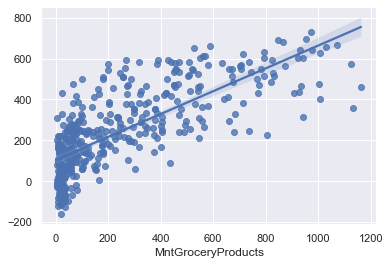

In [46]:
Y = pd.DataFrame(newCustomerData['MntGroceryProducts'])
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth'])
income = pd.DataFrame(newCustomerData['Income'])

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1)
X.head()

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

# Check the Goodness of Fit (on Train Data)
print("Variables: ")
# print("Y: TotalPurchase")
print("Y: MntGroceryProducts")
# print("X: NumWebVisitsMonth")
print("X: NumWebVisitsMonth, Income")
print()
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()